# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [102]:
import json

In [103]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [104]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [105]:
!pip install gensim

### Составление корпуса

In [106]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [107]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [108]:
print(texts[0])
print(dictionary)
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Dictionary(6714 unique tokens: ['black olives', 'feta cheese crumbles', 'garbanzo beans', 'garlic', 'grape tomatoes']...)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [109]:
from gensim.models import ldamodel

In [110]:
np.random.seed(76543)
# здесь код для построения модели:
model = ldamodel.LdaModel(corpus = corpus, num_topics = 40, passes = 5)


In [111]:
tops_print = model.show_topics(num_topics = 40, num_words = 10, formatted = False)
print(len(tops_print[0][1][0]))
print(len(dictionary))

2
6714


In [112]:
elems = ['salt', 'sugar', 'water', 'mushrooms', 'chicken', 'eggs']
ids = [str(dictionary.token2id[x]) for x in elems]
counts = np.zeros(len(elems), dtype = int)
for i in range(len(tops_print)):
    for ind in range(len(elems)):
        for j in range(10):
            if (ids[ind] in tops_print[i][1][j]):
                counts[ind] += 1
print(ids)
save_answers1(counts[0], counts[1], counts[2], counts[3], counts[4], counts[5])

['15', '52', '29', '82', '729', '9']


In [113]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [114]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [115]:
dict_size_bfore = len(dictionary2.dfs)

In [116]:
freq_elems = dict((k, v) for k, v in dictionary2.dfs.items() if v > 4000).keys()
dictionary2.filter_tokens(freq_elems)
dict_size_after = len(dictionary2)

In [117]:
corpus_size_before = 0
for i in range(len(corpus)):
    corpus_size_before += len(corpus[i])

In [118]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]

In [119]:
corpus_size_after = 0
for i in range(len(corpus2)):
    corpus_size_after += len(corpus2[i])
save_answers2(dict_size_bfore, dict_size_after, corpus_size_before, corpus_size_after)

In [120]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [121]:
np.random.seed(76543)
model2 = ldamodel.LdaModel(corpus = corpus2, num_topics = 40, passes = 5)

In [136]:
np.random.seed(76543)
top2 = model2.top_topics(corpus = corpus2, dictionary = dictionary2)
top1


[([(0.07745517, '272'),
   (0.047240492, '577'),
   (0.04663538, '203'),
   (0.045364752, '35'),
   (0.04167296, '70'),
   (0.041212462, '246'),
   (0.040026966, '519'),
   (0.03576873, '839'),
   (0.029579094, '15'),
   (0.028071914, '40'),
   (0.026110465, '44'),
   (0.024104074, '108'),
   (0.024066417, '473'),
   (0.023999805, '230'),
   (0.02199853, '57'),
   (0.019403385, '17'),
   (0.01821612, '59'),
   (0.017496584, '5'),
   (0.015763303, '909'),
   (0.015647888, '268')],
  -2.255523789444079),
 ([(0.091962665, '27'),
   (0.05143594, '98'),
   (0.043391764, '97'),
   (0.042366523, '230'),
   (0.041007716, '362'),
   (0.03949435, '52'),
   (0.036532108, '90'),
   (0.035275124, '3'),
   (0.033564173, '18'),
   (0.02707784, '93'),
   (0.025812022, '29'),
   (0.0243605, '351'),
   (0.023948163, '194'),
   (0.02053002, '15'),
   (0.020480555, '167'),
   (0.016795833, '104'),
   (0.012875676, '311'),
   (0.012106989, '489'),
   (0.011982203, '80'),
   (0.011757588, '632')],
  -2.4075

In [137]:
sum = 0
for i in range(len(top2)):
    sum += top2[i][1]
mean2 = sum / (len(top2))
mean2    

-8.596629015979598

In [131]:
np.random.seed(76543)
top1 = model.top_topics(corpus = corpus, dictionary = dictionary)
sum = 0
for i in range(len(top1)):
    sum += top1[i][1]
mean1 = sum / (len(top1))
mean1  

-6.338386390828257

In [124]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [138]:
save_answers3(mean1, mean2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [146]:
topic_doc = model2.get_document_topics(dictionary2.doc2bow(texts[0]))
topic_doc

[(25, 0.12812187), (31, 0.6175758), (33, 0.13867402)]

Также выведите содержимое переменной *.alpha* второй модели:

In [147]:
model2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [148]:
np.random.seed(76543)
model3 = ldamodel.LdaModel(corpus = corpus2, num_topics = 40, passes = 5, alpha = 1)

In [150]:
topic_doc3 = model3.get_document_topics(dictionary2.doc2bow(texts[0]))
topic_doc3

[(0, 0.021397725),
 (1, 0.021295454),
 (2, 0.021276837),
 (3, 0.021365965),
 (4, 0.021295374),
 (5, 0.021311197),
 (6, 0.021304982),
 (7, 0.021280425),
 (8, 0.021401476),
 (9, 0.021379594),
 (10, 0.021838196),
 (11, 0.021492543),
 (12, 0.021276837),
 (13, 0.022190146),
 (14, 0.021718247),
 (15, 0.021506695),
 (16, 0.021404253),
 (17, 0.021964785),
 (18, 0.021329321),
 (19, 0.021678496),
 (20, 0.024643425),
 (21, 0.021277266),
 (22, 0.021276837),
 (23, 0.021284845),
 (24, 0.02177194),
 (25, 0.021494662),
 (26, 0.021462573),
 (27, 0.021634236),
 (28, 0.021495285),
 (29, 0.02130316),
 (30, 0.042615015),
 (31, 0.0921982),
 (32, 0.02150048),
 (33, 0.021278715),
 (34, 0.021446723),
 (35, 0.021365961),
 (36, 0.02133186),
 (37, 0.021289436),
 (38, 0.021277951),
 (39, 0.06834292)]

In [158]:
sum2 = 0
for i in range(len(texts)):
    topic_doc_2_max = model2.get_document_topics(dictionary2.doc2bow(texts[i]), minimum_probability = 0.01)
    sum2 += len(topic_doc_2_max)
sum3 = 0
for i in range(len(texts)):
    topic_doc_3_max = model3.get_document_topics(dictionary2.doc2bow(texts[i]), minimum_probability = 0.01)
    sum3 += len(topic_doc_3_max)

save_answers4(sum2, sum3)


In [159]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [179]:
model2.get_document_topics(dictionary2.doc2bow(texts[0]))

[(25, 0.12812185), (31, 0.61757034), (33, 0.13867956)]

In [176]:
theta = np.zeros((40, len(texts)))
for j in range(len(texts)):
    topic_doc = model2.get_document_topics(dictionary2.doc2bow(texts[j]))
    for i in range(len(topic_doc)):
        theta[topic_doc[i][0]][j] = topic_doc[i][1]
    

In [186]:
target = [recipe['cuisine'] for recipe in recipes]
len(target)
print()

39774

In [187]:
res = cross_val_score(RandomForestClassifier(), theta.T, target, cv = 3, n_jobs = 8)
print(res)
print(res.mean())

[0.55475939 0.54940413 0.5585307 ]
0.5542314074521043


In [188]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [189]:
save_answers5(res.mean())

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [217]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    recipe = []
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        topic_distr /= np.sum(topic_distr)
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        recipe.append(int(w))
        print (w)
    return(recipe)

In [219]:
recipe = generate_recipe(model2, 7)
print(recipe)
for ind in range(len(recipe)):
    print(model2.id2word(recipe[ind]))

557
267
477
222
38
49
1206
[557, 267, 477, 222, 38, 49, 1206]


TypeError: 'FakeDict' object is not callable

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [220]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [221]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [226]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(20, 20))
    seaborn.heatmap(tc_matrix, square=True)

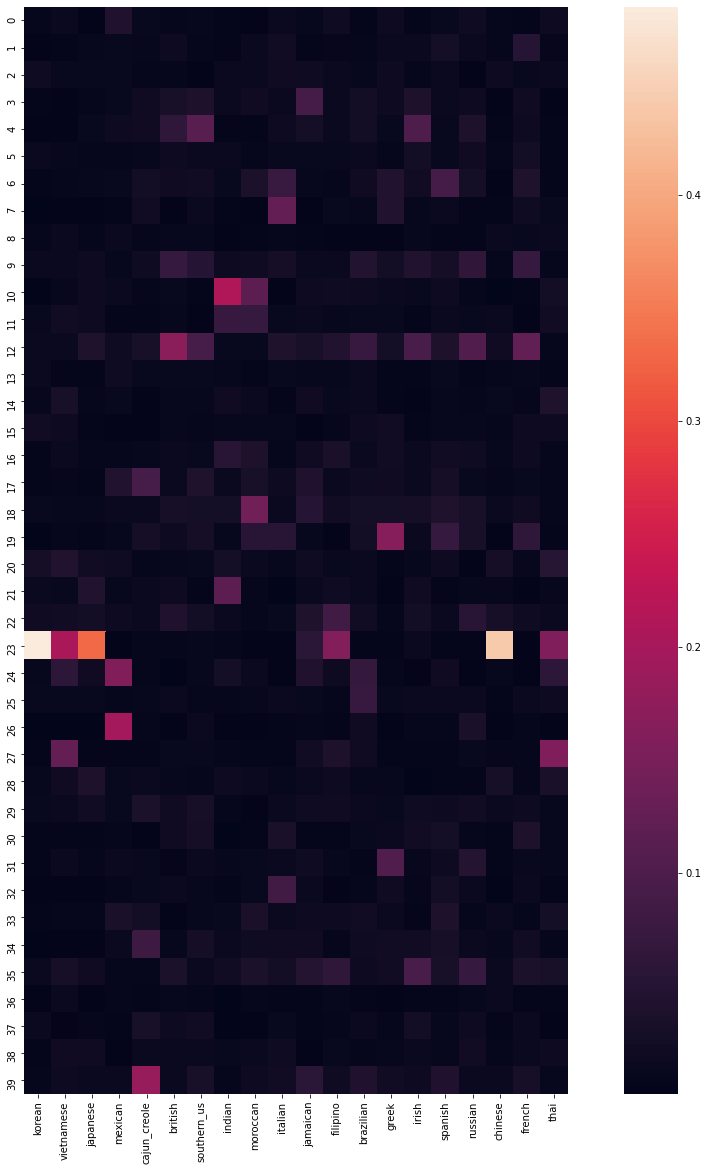

In [227]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(model2, corpus2, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 